<a target="_blank" href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/05%20-%20Clustering/walkthrough_05.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<h1 align="center"> Walkthrough - Lab 5</h1>

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

![clustering image](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

### Clustering
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same group are more similar to each other than with those in other groups. In simple words, the aim is to group similar data points together based on shared traits.

### KMeans Clustering
K-means clustering is one of the simplest and most popular unsupervised machine learning algorithms. You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. 

The algorithm assigns each data point to the nearest centroid, minimizing the within-cluster sum of squares. It iteratively updates the centroids by averaging the data points assigned to each cluster. This process continues until the centroids stabilize or a stopping condition is met. The "means" in K-means refers to this averaging step used to update the cluster centers.

### About the dataset
In this exercise, you will work with a dataset containing the basic information of customers from a mall (including their ID, age, gender, income, spending score). Spending score is something you assign to each customer based on your predefined criteria, such as customer behavior and purchasing data.

### Example of an application of KMeans clustering
This method may be used for example to find the best place to open a new bakery in a city.






## K-MEANS CLUSTERING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## DATA EXPLORATION

In [2]:
df = pd.read_csv("https://github.com/michalis0/Business-Intelligence-and-Analytics/raw/master/data/mall_customers.csv", index_col="CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Checking for null values

In [6]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

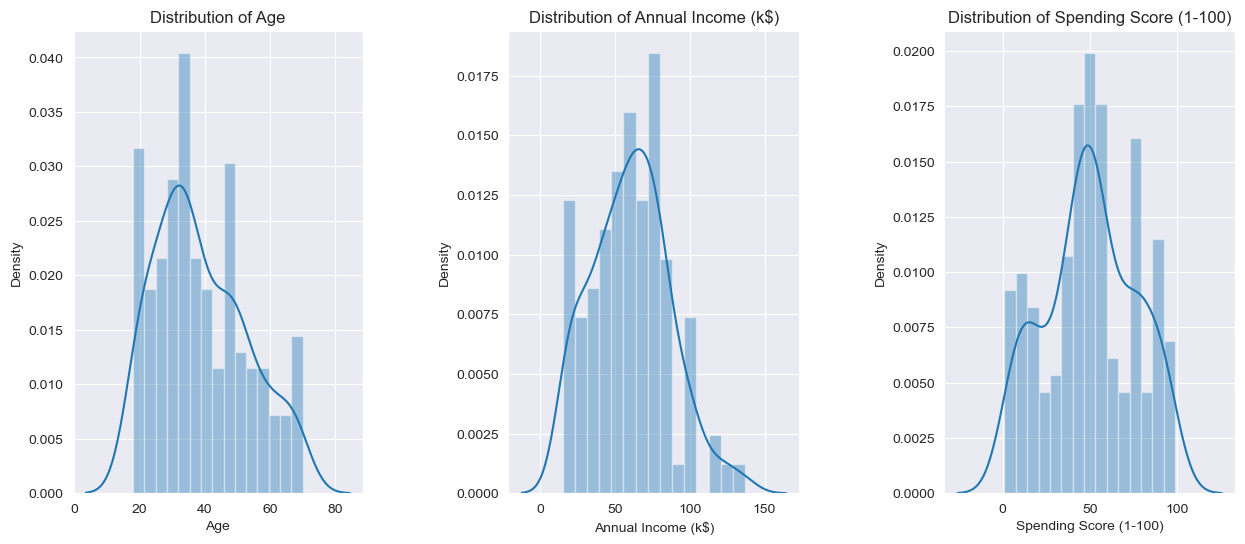

In [7]:
# See the distribution of the values for the numerical columns of the dataset.
plt.figure(1 , figsize = (15 , 6))
n = 0

# Plot each column of the dataframe in a separate subplot
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distribution of {}'.format(x))
plt.show()

Next, we can take a look at the pairplot of the numerical columns in the dataset. Pairplots allow us to see the distribution of each variable and the relationship (correlation) between each pair of variables. We can see the distribution of each variable on the diagonal of the grid. We can also color the data points by a categorical variable, in this case the column `Gender`.

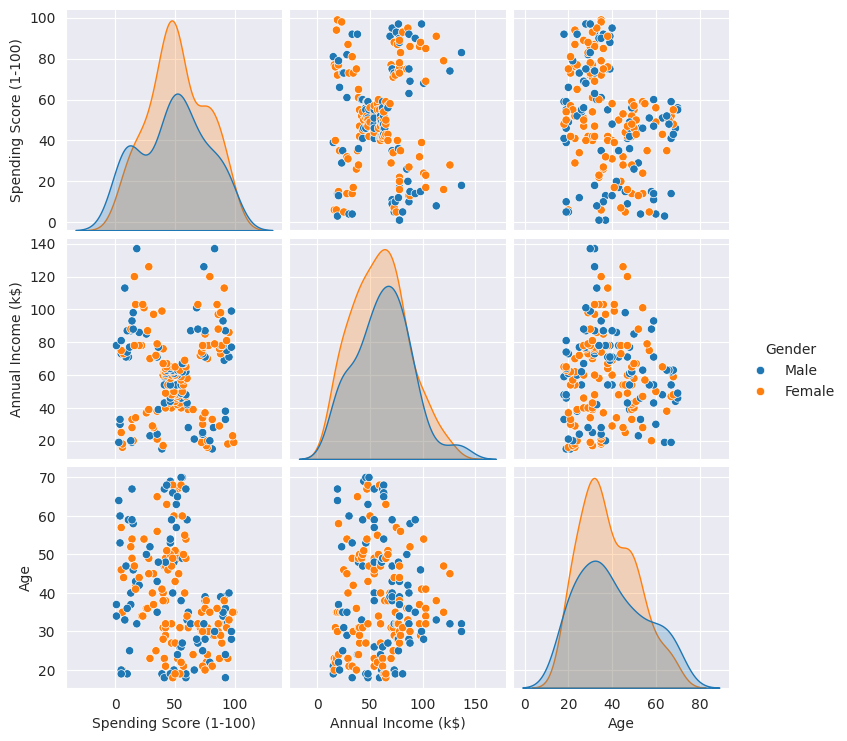

In [8]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

## 2D CLUSTERING BASED ON AGE AND SPENDING SCORE

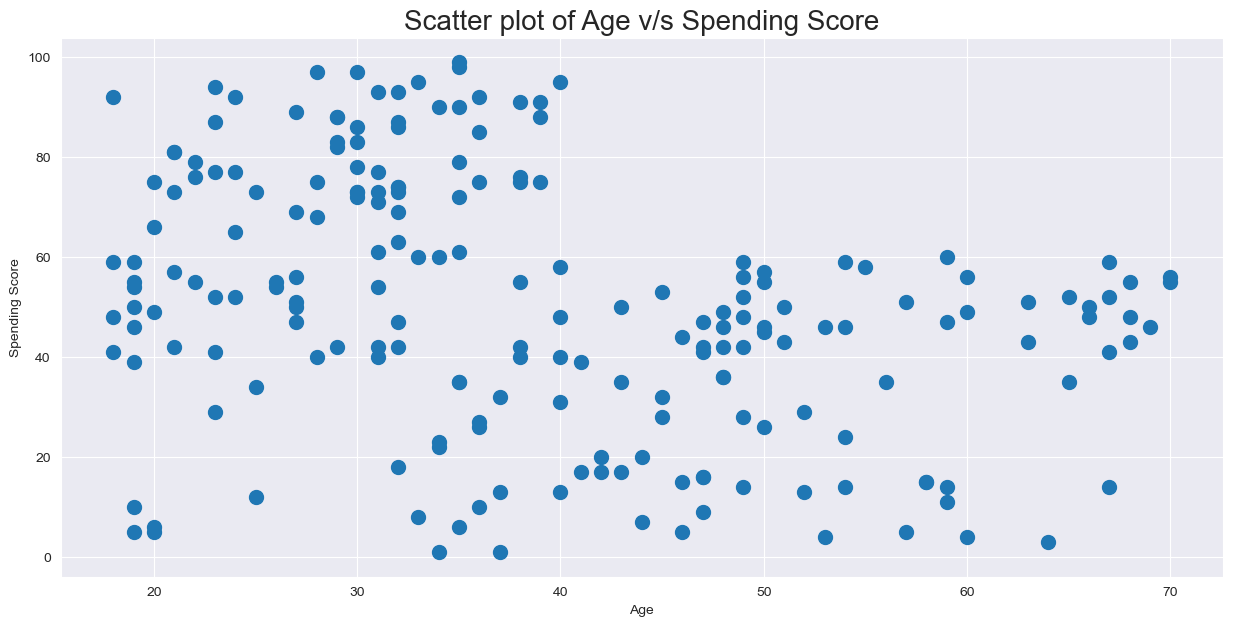

In [8]:
# Scatter plot of Age v/s Spending Score without any clustering
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

#### Deciding K value

We will use the elbow method to find the optimal number of clusters as follows:
- Iterate over the number of clusters and calculate the inertia (i.e. the sum of squared distances of samples to their closest cluster center).
- The optimal number of clusters is **the point after which the inertia starts decreasing in a linear fashion**.

In most real-world datasets, the elbow method does not always produce a clear inflection point to determine the optimal K. In some cases, multiple values of K may appear equally plausible.

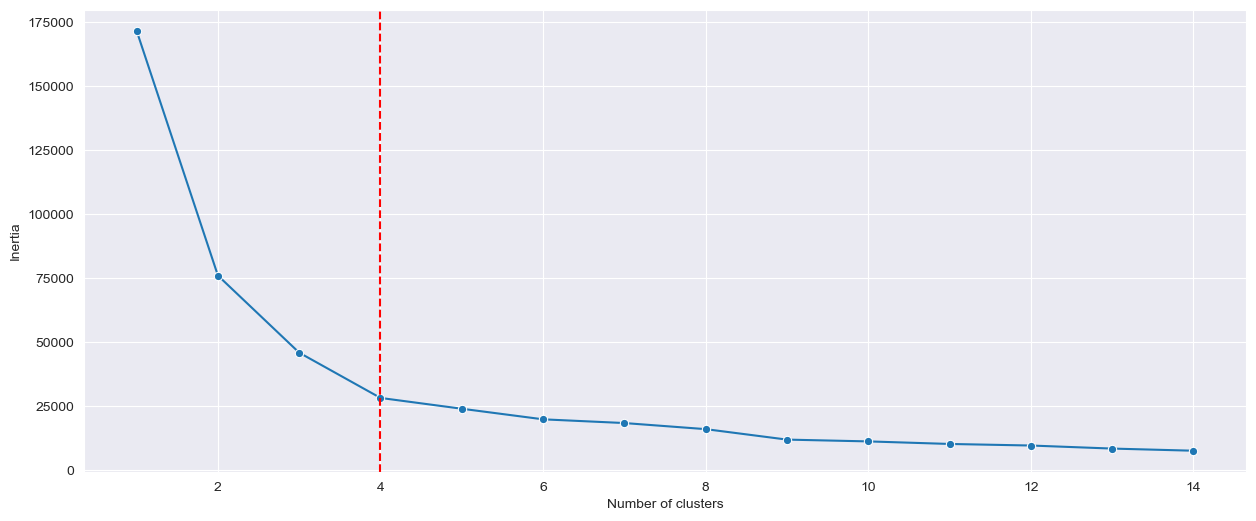

In [9]:
# Elbow method to find the optimal number of clusters
X_2D = df[['Age' , 'Spending Score (1-100)']].values
inertia = []
NB_ITER = 15
for n in range(1 , NB_ITER):
    algorithm = KMeans(n_clusters=n, random_state= 111)
    algorithm.fit(X_2D)
    inertia.append(algorithm.inertia_)

# Plot vertical line at the point of maximum curvature
plt.figure(1 , figsize = (15 ,6))
sns.lineplot(x = np.arange(1 , NB_ITER), y=inertia, sort=False, marker='o')
plt.xlabel('Number of clusters') , plt.ylabel('Inertia')
plt.axvline(x=4, color='r', linestyle='--') # We plot manually the red line on x=4
plt.show()

From the previous Elbow plot, we can see that the optimal number of clusters appears to be 4. So we will use this in the following section.

In [19]:
num_clusters = 4
algorithm = KMeans(n_clusters=num_clusters, random_state= 111)
algorithm.fit(X_2D)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

Now let's take a look at the cluster centroids and the assignment of each datapoint to a cluster. The `labels_` method from `KMeans` gives us the indices of the clusters assigned to each data point. The `cluster_centers_` method gives us the coordinates of each cluster center.

In [11]:
# The labels are the cluster indices assigned to each data point
print(labels1)

[0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 0 1 2 0 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1
 2 1 2 3 2 3 0 1 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 3 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 3 2
 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [12]:
# Print the centroids coordinates. The first row indicates the coordinates of
# the centroid of cluster 0, the second row indicates the coordinates of the
# centroid of cluster 1, and so on.
print(centroids1)

[[27.32608696 49.36956522]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.40816327 48.04081633]]


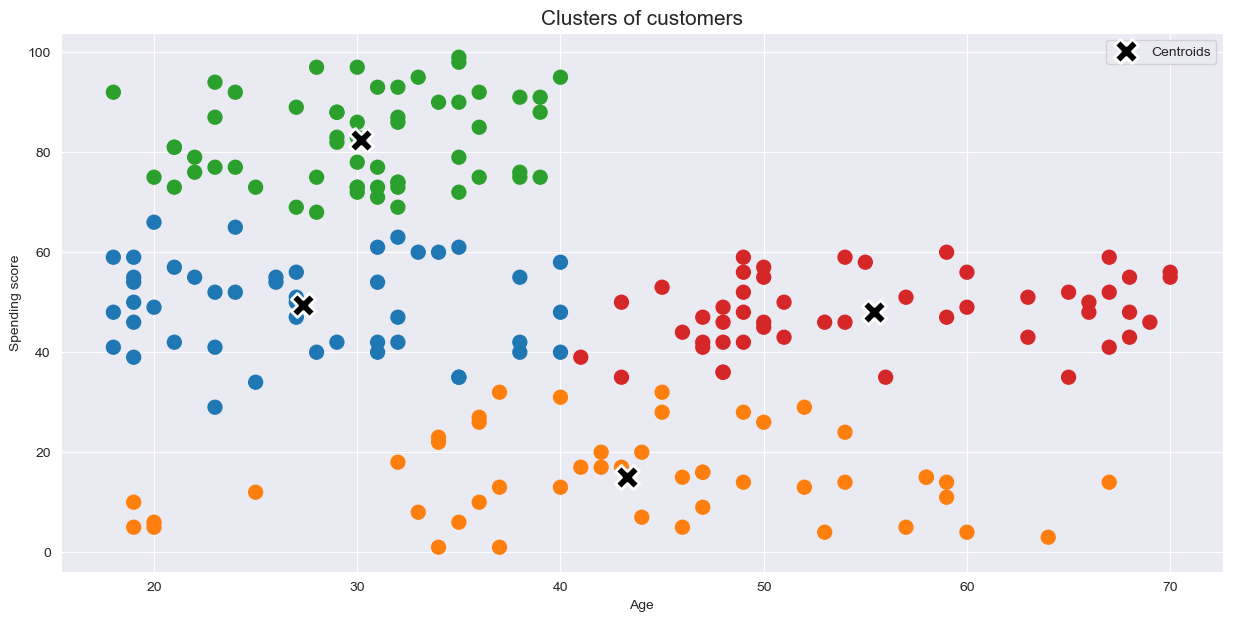

In [24]:
# Define a visually distinct color palette
palette = sns.color_palette("tab10", num_clusters)

# Create a scatter plot of the data colored by the cluster labels
plt.figure(figsize=(15, 7))

# Scatter plot for data points with distinct colors for each cluster
plt.scatter(df['Age'], df['Spending Score (1-100)'], 
            s=100, c=[palette[label] for label in algorithm.labels_])

# Scatter plot for centroids with a distinct color and marker
plt.scatter(centroids1[:, 0], centroids1[:, 1], 
            s=300, c='black', marker='X', edgecolors='white', 
            linewidth=2, label='Centroids')

plt.title('Clusters of customers', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()
plt.show()

In [25]:
# This code creates a mesh grid of the data points found in X_2D[:, 0] and X_2D[:, 1]
# with a step size of h (in this case 0.02).
# The mesh grid is then used to predict the output of the algorithm for each point on the grid.
# The result is stored in the Z variable.

h = 0.02

# Get the minimum and maximum values of the data
# +/- 1 to be sure that the meshgrid cover the space for every data
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1

# Create a mesh grid of all the points in the plot
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use the predict method of the algorithm to predict the output for all the points
# in the mesh grid. So here the 'algorithm' is related to the k-means we did.
# We use it to predict the output every point of the meshgrid according to the
# training we did. -> represented by the colors dividing the graph below
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

# NOTE :
# np.c_ is a NumPy function used to concatenate two arrays along the second axis.
# It takes two arrays and returns an array combining them along the second axis.
# In this case, it combines the two arrays xx.ravel() and yy.ravel() along the
# second axis, which is the column axis.
# The result is an array of two columns, which is then used by the algorithm.predict()
# method to predict the output for each point on the mesh grid.

The plot below shows how the trained K-Means algorithm classifies new data points into one of the four clusters. The decision boundaries represent the regions where each new point would be assigned based on its proximity to the cluster centroids.

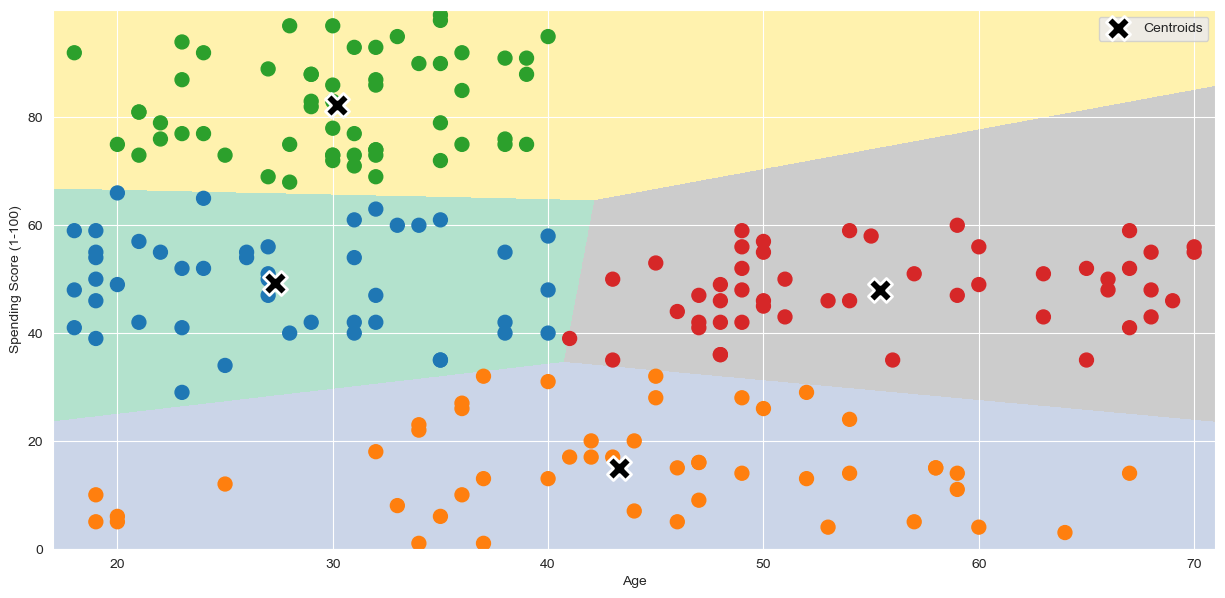

In [28]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(df['Age'], df['Spending Score (1-100)'], 
            s=100, c=[palette[label] for label in algorithm.labels_])
plt.scatter(centroids1[:, 0], centroids1[:, 1], 
            s=300, c='black', marker='X', edgecolors='white', 
            linewidth=2, label='Centroids')
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.legend()
plt.show()

## 3D CLUSTERING AGE, ANNUAL INCOME AND SPENDING INCOME

We can generalize the previous method for more than 2 dimensions. However, the visual interpretation will become harder in 3d and impossible in 4+ dimensions.
In this part, we will first work with the same example as before but we will take into account one more feature which is the annual income.

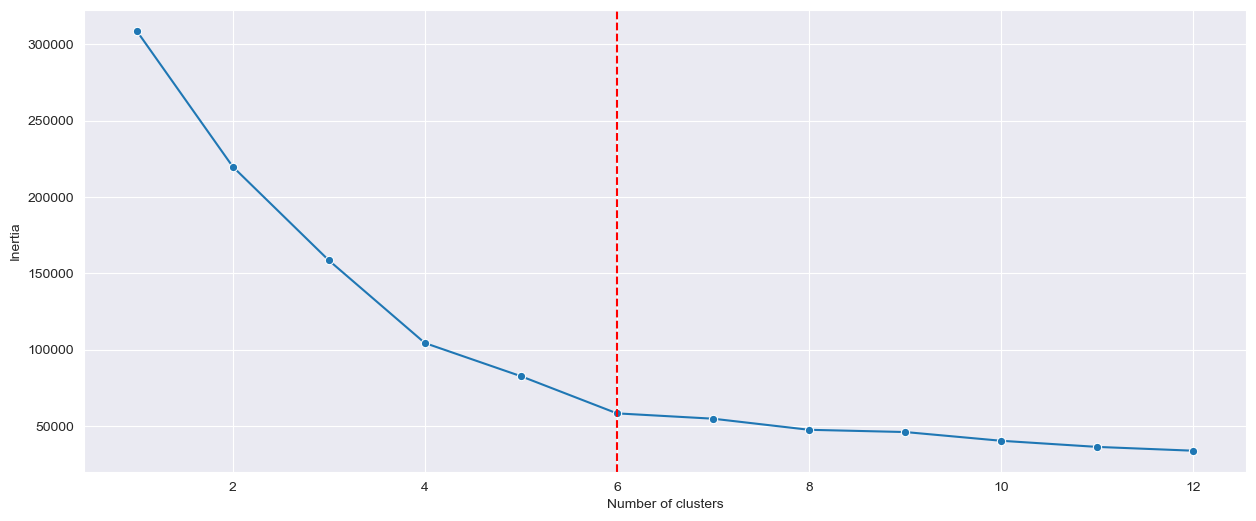

In [31]:
# Elbow method to find the optimal number of clusters
X_3D = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].values
inertia = []
NB_ITER = 13
for n in range(1 , NB_ITER):
    algorithm = KMeans(n_clusters=n, random_state= 111)
    algorithm.fit(X_3D)
    inertia.append(algorithm.inertia_)

# Plot vertical line at the point of maximum curvature
plt.figure(1 , figsize = (15 ,6))
sns.lineplot(x = np.arange(1 , NB_ITER), y = inertia, sort = False, marker='o')
plt.xlabel('Number of clusters') , plt.ylabel('Inertia')
plt.axvline(x=6, color='r', linestyle='--')
plt.show()

In [32]:
num_clusters = 6
algorithm = KMeans(n_clusters=num_clusters, random_state= 111)
algorithm.fit(X_3D) #fit with the values
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X_3D)
# add a new column to the dataframe which indicates the cluster index assigned to each point.
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,Male,19,15,39,2.0
2,Male,21,15,81,4.0
3,Female,20,16,6,2.0
4,Female,23,16,77,4.0
5,Female,31,17,40,2.0


In [34]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'],
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## Hierarchical clustering

##### Hierarchical clustering is a type of clustering algorithm that builds a hierarchy of clusters. It starts by treating each data point as a single cluster. Then, it iteratively merges the closest pairs of clusters until all the data points have been merged into a single cluster, or a stopping criterion is met. This process can be visualized using a dendrogram, a tree-like diagram that shows the sequence of merges and the distance at which each merge occurred. Hierarchical clustering can be performed using different linkage criteria to determine the distance between clusters, such as single linkage (minimum distance), complete linkage (maximum distance), average linkage, and Ward's method (minimizing variance increase).

Now, applying this concept to the Spending Score column of our dataset, we are going to use hierarchical clustering to group customers based on their spending scores, identifying patterns in how different customers spend, and segmenting them into hierarchically organized clusters based on the similarity of their spending behaviors.



In [35]:
X_2 = df[['Spending Score (1-100)']]

#### Use of the Agglomerative Clustering method.

In [38]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
clustering.fit(X_2)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [39]:
# Print the labels
clustering.labels_

array([2, 1, 0, 3, 2, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3,
       0, 3, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 1, 0, 3, 0, 3, 0, 1, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 3, 0, 1, 0, 3, 0, 3,
       0, 3, 0, 1, 0, 3, 0, 3, 0, 1, 2, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 3,
       0, 1, 0, 3, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 1,
       0, 3, 0, 1, 0, 1, 0, 1, 2, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3,
       0, 1])

##### This plot is like a colorful map that shows us how spending scores of individuals are grouped into families, or "clusters", based on how similar their spending habits are. Imagine each color represents a different family. The points in the same color are like family members who spend their money in similar ways. This helps us understand the different spending behaviors among the people in the dataset, just like identifying different groups of friends in a school based on their interests!

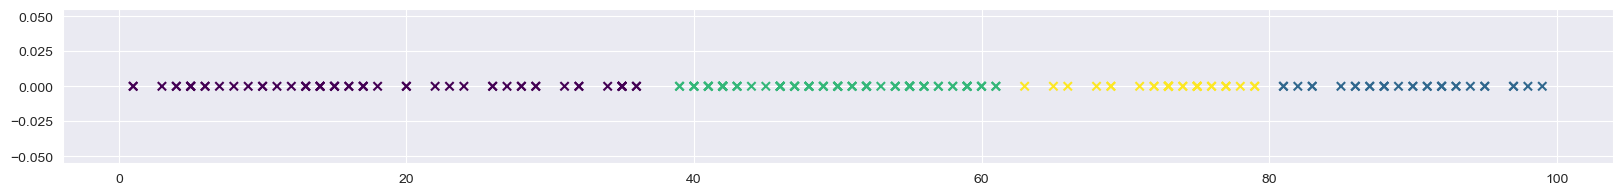

In [40]:
plt.figure(figsize=(20,2))
plt.scatter(X_2, np.zeros_like(X_2), marker='x', c=clustering.labels_, cmap='viridis')

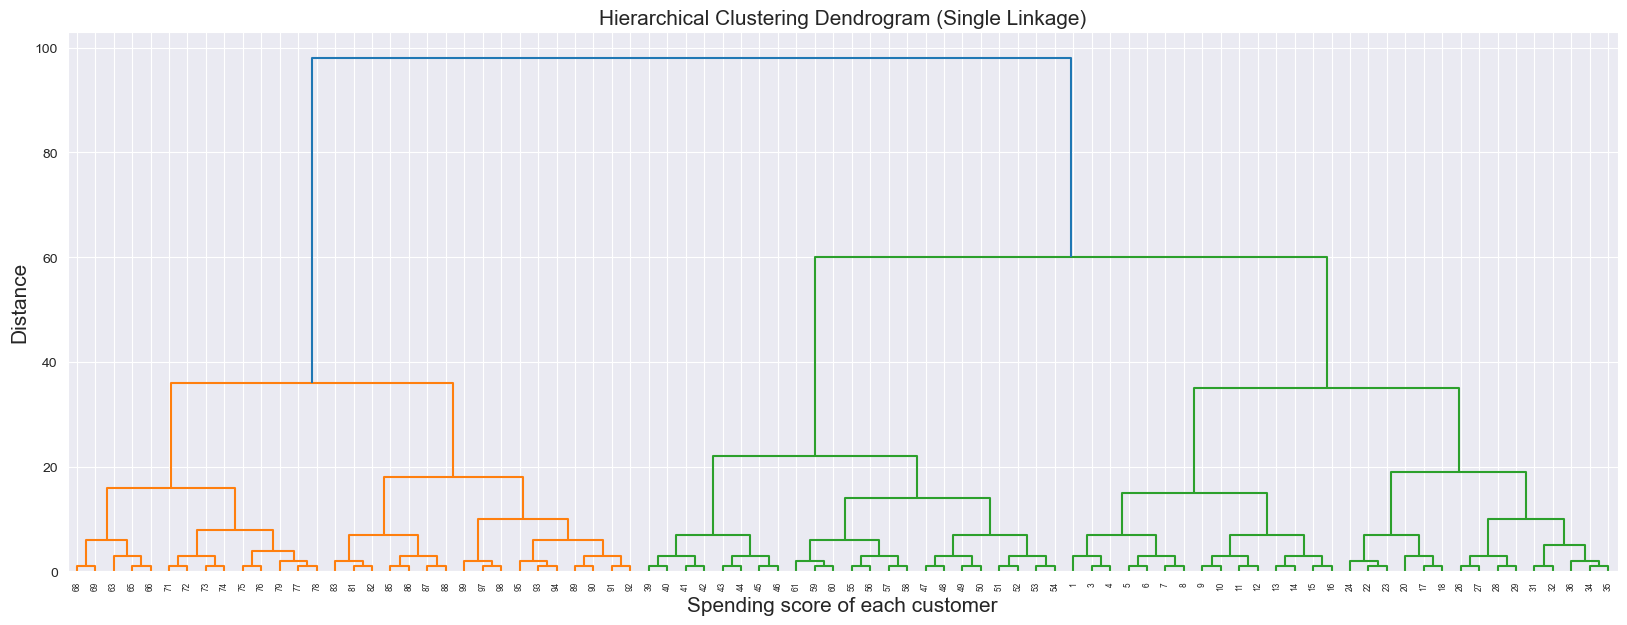

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 7))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)', fontsize=15)
plt.xlabel('Spending score of each customer', fontsize=15)
plt.ylabel('Distance', fontsize=15)

# To make the plot easier to read, let's only keep the unique spending score values.
X_2 = np.reshape(np.unique(X_2), (-1, 1))

# Provide the linkage method we want and the chosen distance metric.
W = linkage(X_2, method='complete', metric='euclidean')
dendrogram(W, labels=X_2.reshape(-1)) # compute the dendogram according the linkage

plt.show()